Import Module

In [1]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Generate Datasets using make_blobs

In [2]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, cluster_std = 2, random_state = 2)

One-Hot Encoding

In [3]:
y = to_categorical(y)

Split datasets

In [5]:
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


Define Model

In [6]:
model = Sequential()
model.add(Dense(25, input_dim = 2, activation = 'relu')) #hidden_layer
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

Learning

In [8]:
history = model.fit(train_X, train_y, epochs = 50, validation_data = (test_X, test_y),
                    verbose = 1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1885 - loss: 1.9013 - val_accuracy: 0.1400 - val_loss: 1.4285
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1305 - loss: 1.3264 - val_accuracy: 0.4150 - val_loss: 1.0869
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 1.0682 - val_accuracy: 0.4400 - val_loss: 0.9513
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4573 - loss: 0.9361 - val_accuracy: 0.4750 - val_loss: 0.8712
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4629 - loss: 0.8969 - val_accuracy: 0.5300 - val_loss: 0.8096
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5028 - loss: 0.8442 - val_accuracy: 0.5750 - val_loss: 0.7540
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 0.7800 - val_accuracy: 0.6650 - val_loss: 0.7088
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6484 - loss: 0.7096 - val_accuracy: 0.7250 - val_loss

Model Evaluation

In [11]:
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7962 - loss: 0.4531
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8420 - loss: 0.4134 
Train: 0.822, Test: 0.860


Visualization

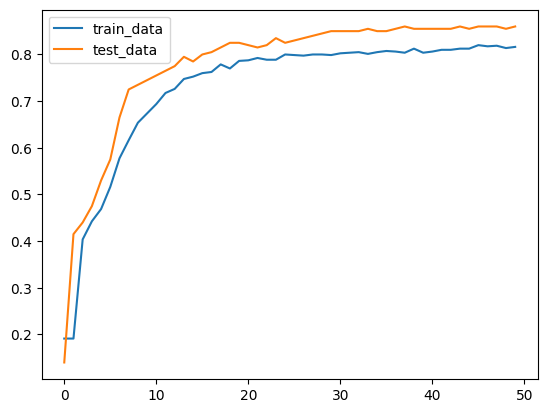

In [12]:
pyplot.plot(history.history['accuracy'], label = 'train_data')
pyplot.plot(history.history['val_accuracy'], label = 'test_data')
pyplot.legend()
pyplot.show()